# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## First, we load the required libraries for data analysis

In [2]:
#I am starting by loading in all of the necessary data sets


# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    #plot_confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Read-in the dataset

In [3]:
stardata = pd.read_csv("StarHotelsGroup.csv")

In [4]:
stardata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [5]:
stardata.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
stardata.shape

(56926, 18)

#### Observation
* There are 56,926 rows and 18 columns.

## Data Overview

- Observations
- Sanity checks

In [7]:
stardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

#### Observation
* There are 1 float64 type, 13 int64 typees, and 4 objects. There doesn't appear to be any missing values.

In [8]:
stardata.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,56926.000000,56926.000000,56926.00000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000,56926.000000
mean,1.875856,0.110723,0.83584,2.261901,0.026332,93.713909,2018.248340,6.490215,15.635913,0.024664,0.020939,0.167902,109.610570,0.666040
std,0.518667,0.408885,0.87590,1.432371,0.160123,92.408296,0.644619,3.027185,8.718717,0.155099,0.326142,1.943647,38.256075,0.814257
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.00000,1.000000,0.000000,21.000000,2018.000000,4.000000,8.000000,0.000000,0.000000,0.000000,85.000000,0.000000
50%,2.000000,0.000000,1.00000,2.000000,0.000000,65.000000,2018.000000,6.000000,16.000000,0.000000,0.000000,0.000000,105.000000,0.000000
75%,2.000000,0.000000,2.00000,3.000000,0.000000,142.000000,2019.000000,9.000000,23.000000,0.000000,0.000000,0.000000,129.700000,1.000000
max,4.000000,10.000000,8.00000,17.000000,1.000000,521.000000,2019.000000,12.000000,31.000000,1.000000,13.000000,72.000000,540.000000,5.000000


#### Observations 
* The average number of adults is close to 2 people.
* The average number of children is close to zero.
* The average number of week nights are higher than weekend nights by 1+ day.
* The lead time to booking the hotel is on average 93 days.
* There are more people who have not cancelled than have previously.

In [9]:
#lets convert the object types to categorical types 
stardata["type_of_meal_plan"]=stardata["type_of_meal_plan"].astype("category")
stardata["room_type_reserved"]=stardata["room_type_reserved"].astype("category")
stardata["market_segment_type"]=stardata["market_segment_type"].astype("category")
stardata["required_car_parking_space"]=stardata["required_car_parking_space"].astype("category")
stardata["repeated_guest"]=stardata["repeated_guest"].astype("category")

In [10]:
stardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   type_of_meal_plan                     56926 non-null  category
 5   required_car_parking_space            56926 non-null  category
 6   room_type_reserved                    56926 non-null  category
 7   lead_time                             56926 non-null  int64   
 8   arrival_year                          56926 non-null  int64   
 9   arrival_month                         56926 non-null  int64   
 10  arrival_date                          56926 non-null  int64   
 11  ma

#### Observation
* There are now 9 category types.

In [11]:
print(stardata.no_of_adults.value_counts())
print(stardata.no_of_children.value_counts())
print(stardata.no_of_weekend_nights.value_counts())
print(stardata.no_of_week_nights.value_counts())
print(stardata.type_of_meal_plan.value_counts())
print(stardata.required_car_parking_space.value_counts())
print(stardata.room_type_reserved.value_counts())
print(stardata.arrival_year.value_counts())
print(stardata.arrival_month.value_counts())
print(stardata.market_segment_type.value_counts())
print(stardata.repeated_guest.value_counts())
print(stardata.no_of_previous_cancellations.value_counts())
print(stardata.no_of_previous_bookings_not_canceled.value_counts())
print(stardata.no_of_special_requests.value_counts())
print(stardata.booking_status.value_counts())

2    41401
1    11021
3     4282
0      193
4       29
Name: no_of_adults, dtype: int64
0     52446
1      2720
2      1716
3        41
9         2
10        1
Name: no_of_children, dtype: int64
0    25718
1    15808
2    14850
3      242
4      233
5       40
6       32
8        2
7        1
Name: no_of_weekend_nights, dtype: int64
2     17366
1     14393
3     12967
4      4999
0      3547
5      2788
6       324
7       174
8       126
10      108
9        52
11       20
12       18
15       15
14       10
13        9
16        7
17        3
Name: no_of_week_nights, dtype: int64
Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
0    55427
1     1499
Name: required_car_parking_space, dtype: int64
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
2018    29761
2019    20651
20

#### Observations

* Majority of the bookings are with 2 adults.
* Majority of the bookings also do not include children.
* The highest number of reservations are not on the weekend nights.
* Majority of the people selected Meal plan 1 or none at all. Meanwhile, Meal Plan 3 only had 8 reservations.
* A majority of people did not reserve a parking spot.
* Room type 1 is the most popular.
* Majority of reservations were made for 2018.
* The most popular month for reservations is in August.
* There is a large majority of people who are not repeated guests as well as a majority have not previously cancelled their reservation.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

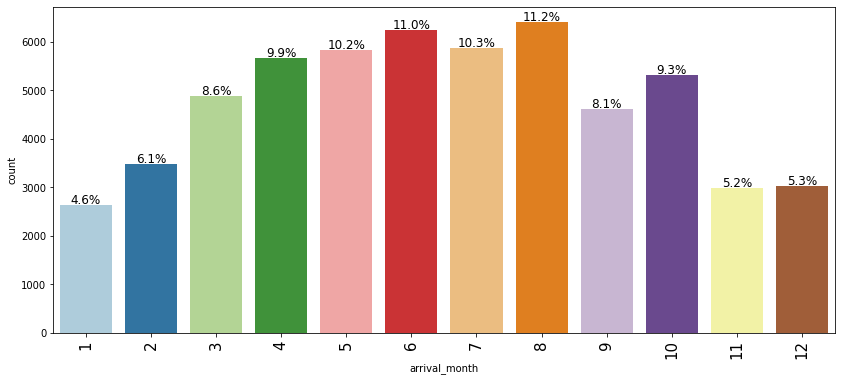

In [13]:
labeled_barplot(stardata, "arrival_month", perc=True)

#### Observation
* The graph clearly displays that the summer months are the busiest with August being the busiest month and June trailing not far behind. 

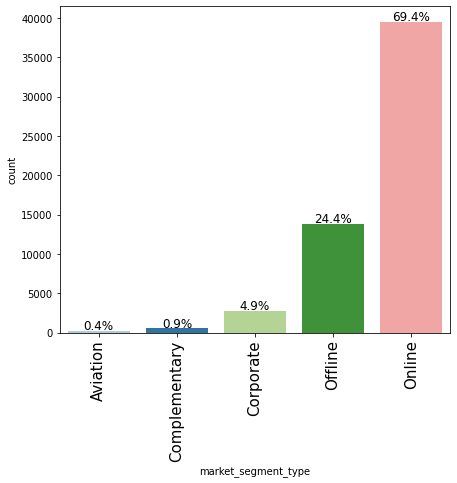

In [14]:
labeled_barplot(stardata, "market_segment_type", perc=True)

#### Observation

* The majority of the reservations were made online.

In [15]:
stardata.groupby("market_segment_type")["avg_price_per_room"].mean()

market_segment_type
Aviation         102.810830
Complementary      2.698563
Corporate         84.142160
Offline           93.576602
Online           118.537969
Name: avg_price_per_room, dtype: float64

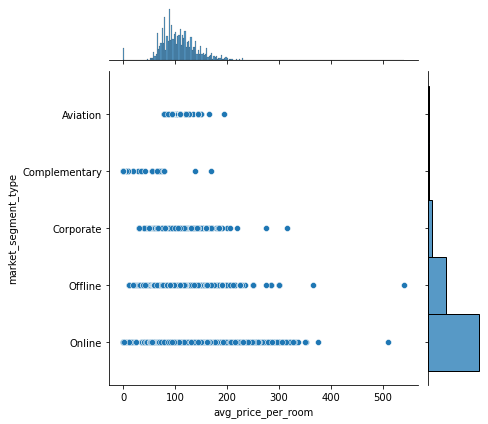

In [16]:
#lets look at the market segment type and average price per room through a visual graph 
sns.jointplot(stardata['avg_price_per_room'], stardata['market_segment_type']);

In [17]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a triangle will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='-') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='--') # Add median to the histogram

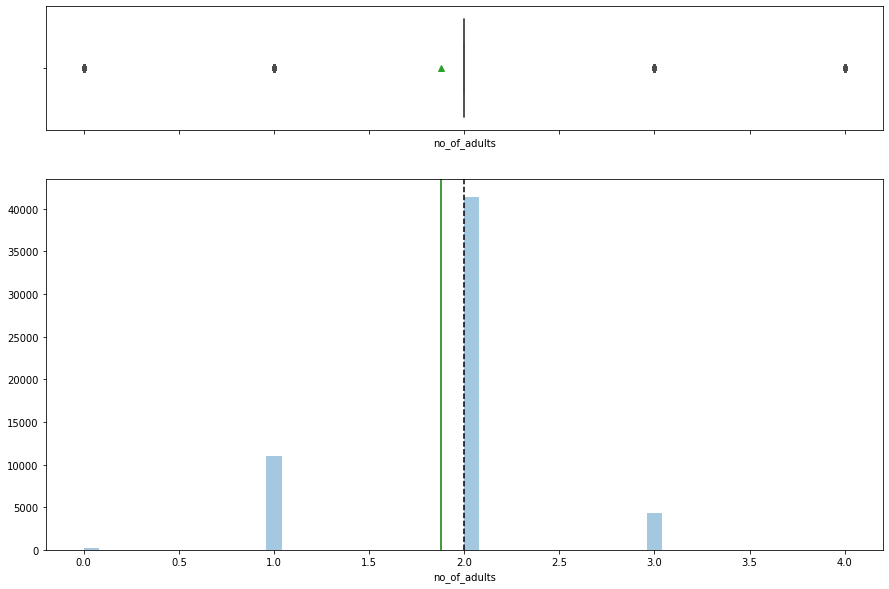

In [18]:
histogram_boxplot(stardata.no_of_adults);

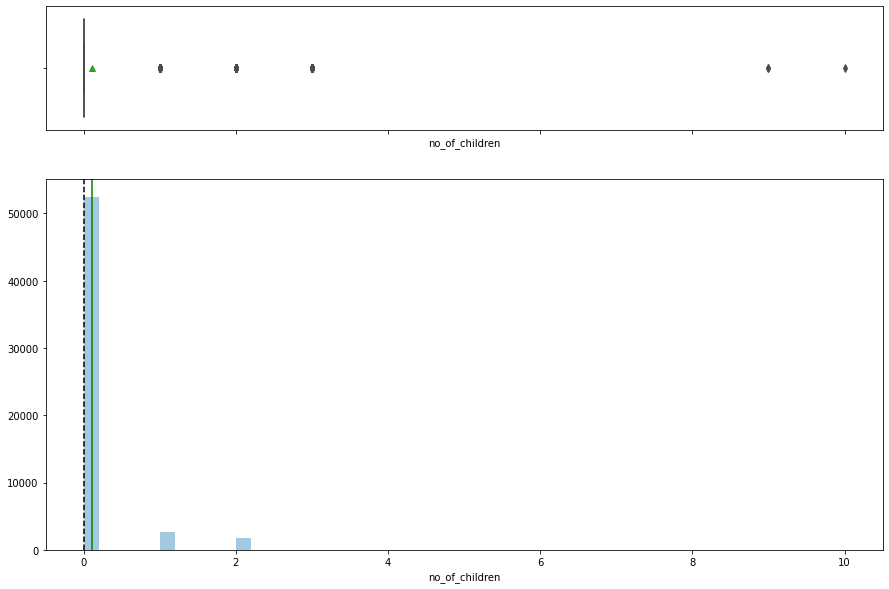

In [19]:
histogram_boxplot(stardata.no_of_children);

#### Observation
* Using the graph above, it clearly shows that the the average and median number of children are around zero. However, there are outliers going up all the way to 10 children.

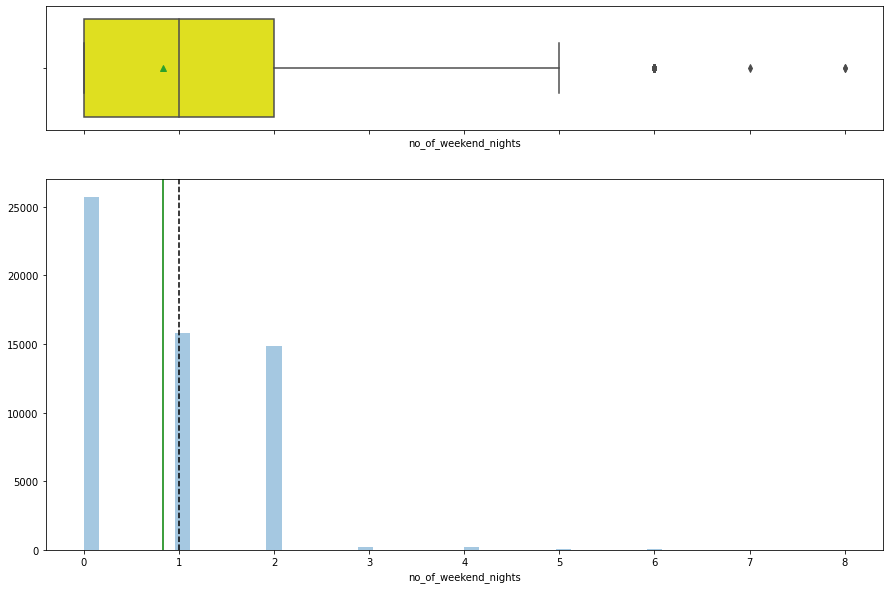

In [20]:
histogram_boxplot(stardata.no_of_weekend_nights);

#### Observation
* Using the graph above, we can see that most of the weekend night bookings fall between 0 and 2 nights with an average of 1 night per weekend. However, there are outliers making this a right skewed graph.

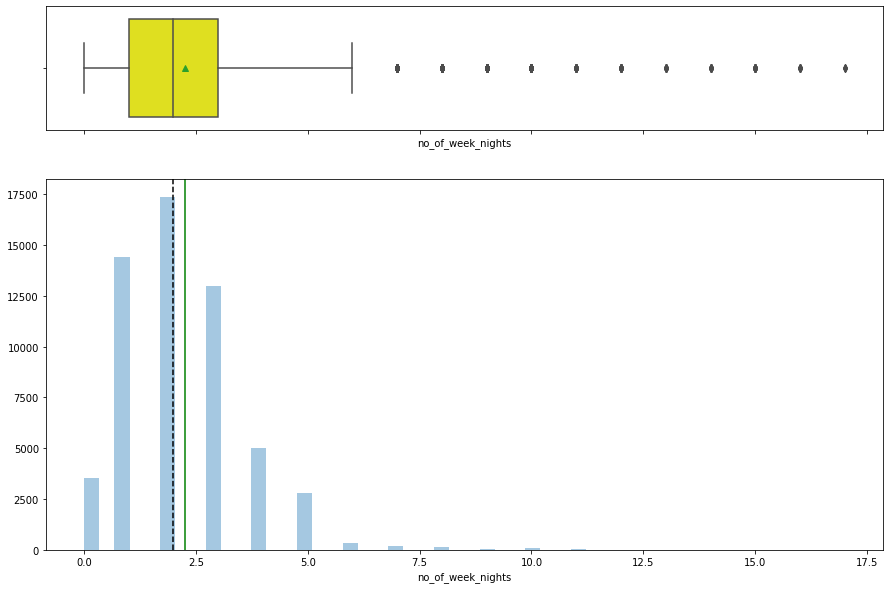

In [21]:
histogram_boxplot(stardata.no_of_week_nights);

#### Observation 
* Using the graph above, we see that the majority of the week nights are booked around 2.5 days. However, there are several outliers making this a right skewed graph.

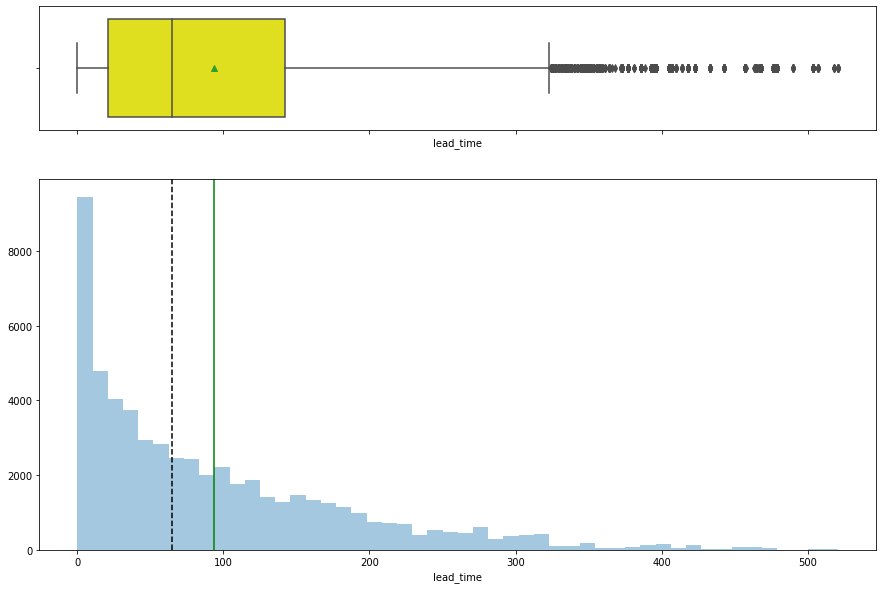

In [22]:
histogram_boxplot(stardata.lead_time);

#### Observation
* Using the graph above, we see that the average number of days a booking is made before the reservation is around 90 days or about 4 months. There are several outliers on the right which indicate that people are booking over a year in advance, therefore this is a right skewed graph.

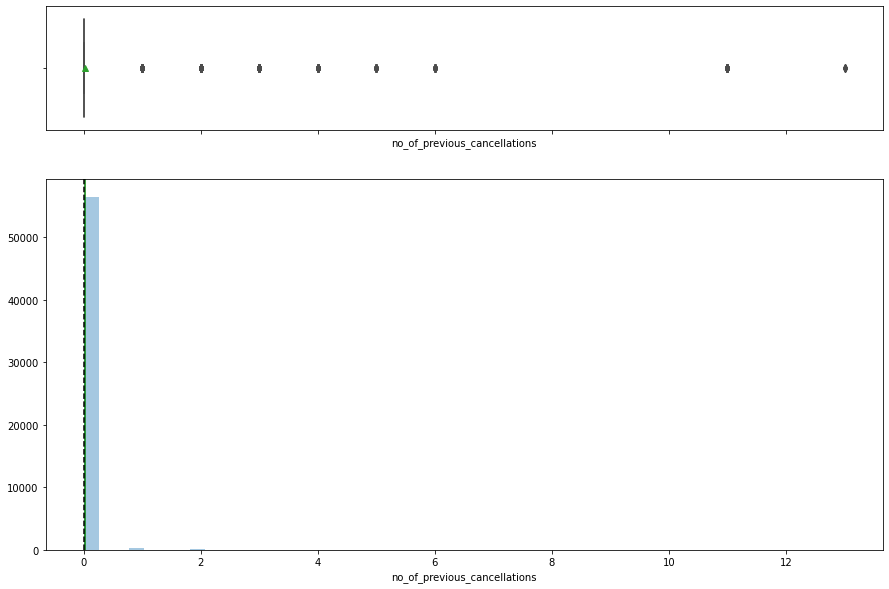

In [23]:
histogram_boxplot(stardata.no_of_previous_cancellations);

#### Observation 
* Using the graph above, we see that most people (on average) have not cancelled their reservation previously. However, there are some outliers that go as high as 12 prior cancellations.

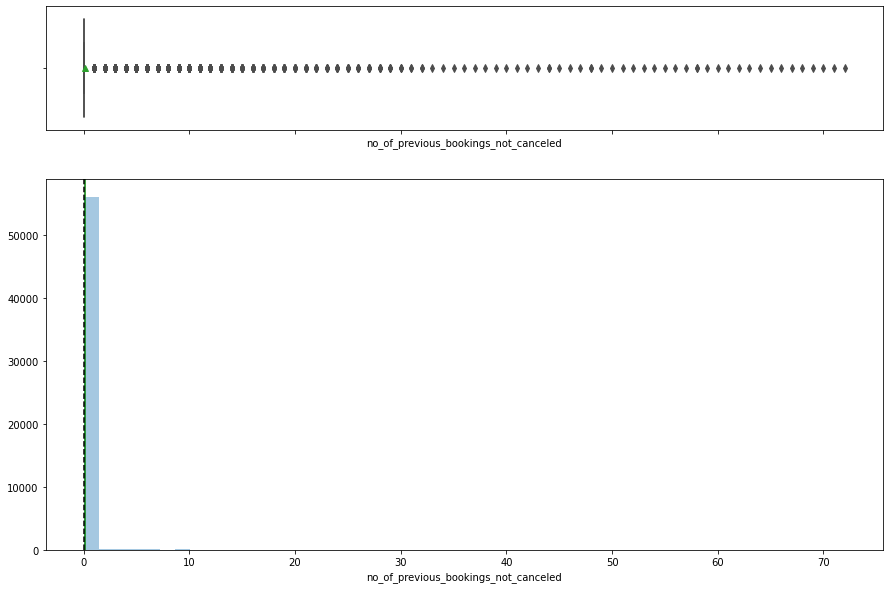

In [24]:
histogram_boxplot(stardata.no_of_previous_bookings_not_canceled);

#### Observations 
* Using the graph above, we see that there is (on average) zero previous bookings not cancelled, but we do have multiple outliers going above 70 of previous bookings not canceled.

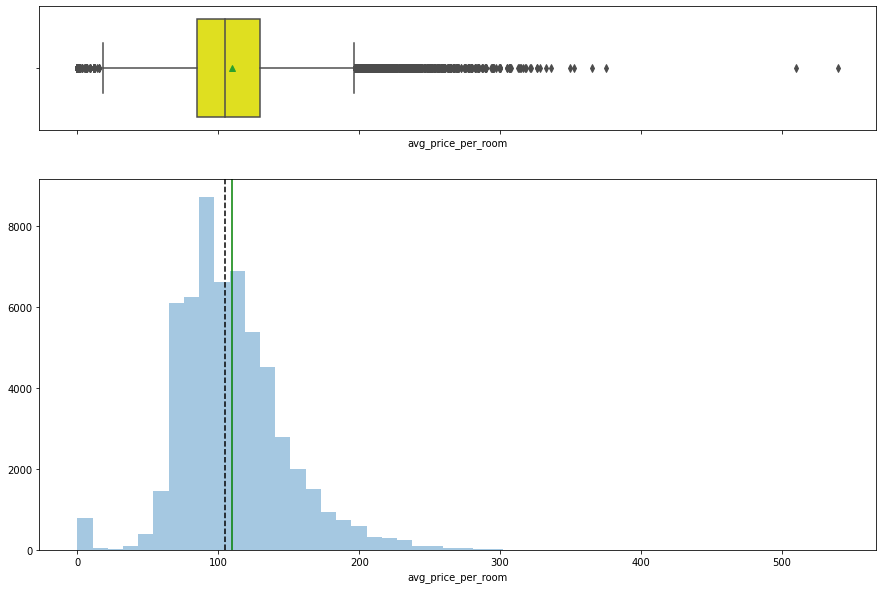

In [25]:
histogram_boxplot(stardata.avg_price_per_room);

#### Observation
* Using the graph above, we can conclude that the average and median are close at around $100 per room. However, there are outliers on both sides.

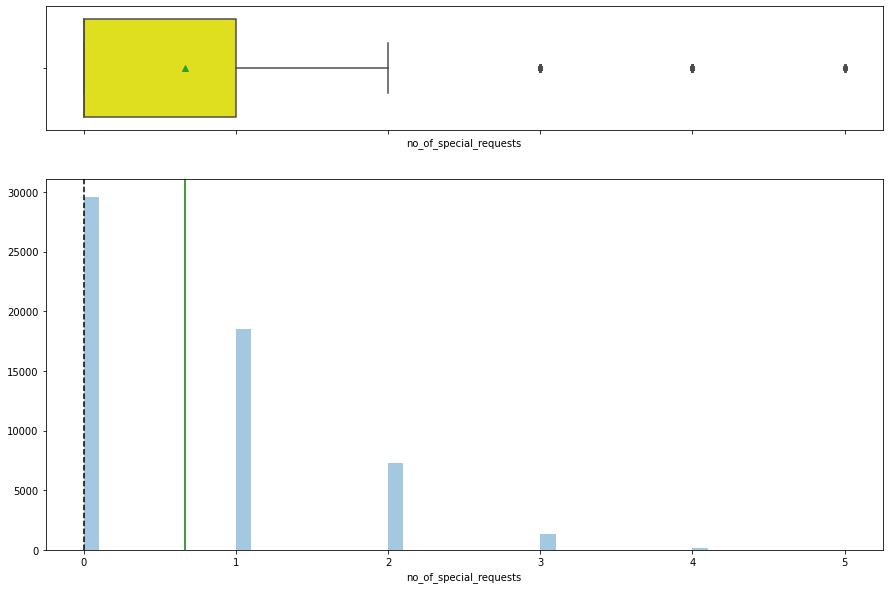

In [26]:
histogram_boxplot(stardata.no_of_special_requests);

#### Observations

* Using the graph above, we can conclude that most of the data lies between 0 and 1 in terms of number of special requests. Furthermore, there are outliers to the right with some people making multiple special requests.

In [27]:
#lets compare the market segement type and average price per room through a visual graph
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

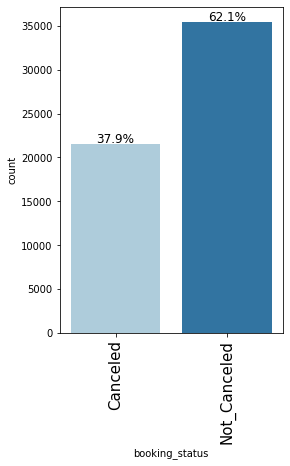

In [28]:
labeled_barplot(stardata, "booking_status", perc=True)

#### Observation
* There are more bookings that are not canceled compared to those that are canceled, the detailed percenatge ratio is shown above.

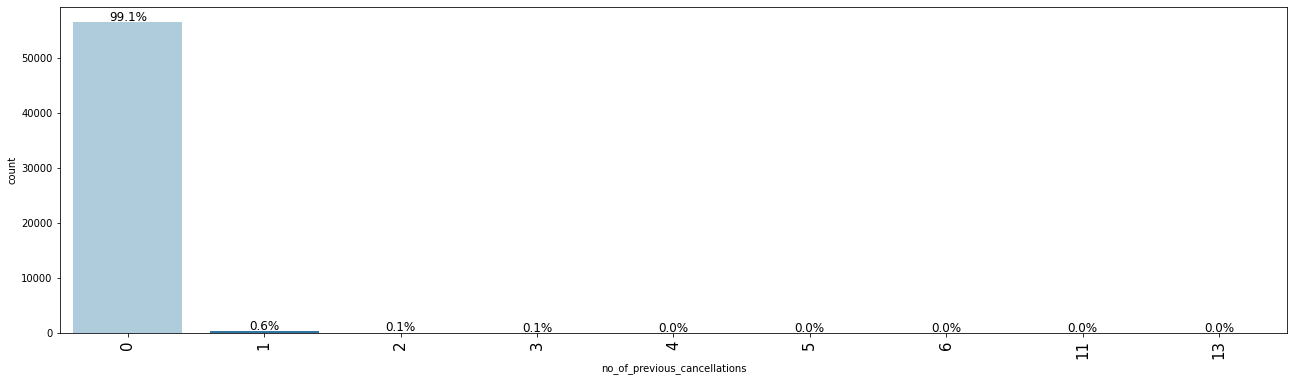

In [29]:
labeled_barplot(stardata, "no_of_previous_cancellations", n=20, perc=True)

In [30]:
#let's compare no_of_previous_cancellations with repeated_guest
print(stardata.no_of_previous_cancellations.value_counts())

0     56411
1       316
2        66
3        47
11       25
4        25
6        16
5        16
13        4
Name: no_of_previous_cancellations, dtype: int64


In [31]:
(len(stardata[stardata["no_of_previous_cancellations"] == 0]["repeated_guest"]) / len(stardata)) * 100

99.0953167269789

#### Observation 
* 99% of repeated guests have not cancelled their reservation.

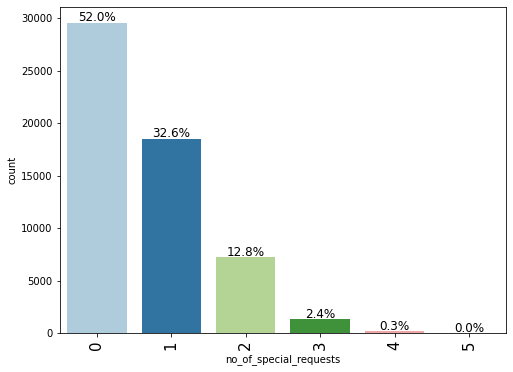

In [32]:
labeled_barplot(stardata, "no_of_special_requests", perc=True)

#### Observation
* Nearly half of all bookings require a special request (48%).

In [33]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["salary"], margins=True).sort_values(
        by=" >50K", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["salary"], normalize="index").sort_values(
        by=" >50K", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

no_of_special_requests      0      1     2     3    4   5    All
booking_status                                                  
Not_Canceled            15390  12837  5607  1356  169  19  35378
All                     29574  18540  7268  1356  169  19  56926
Canceled                14184   5703  1661     0    0   0  21548
------------------------------------------------------------------------------------------------------------------------


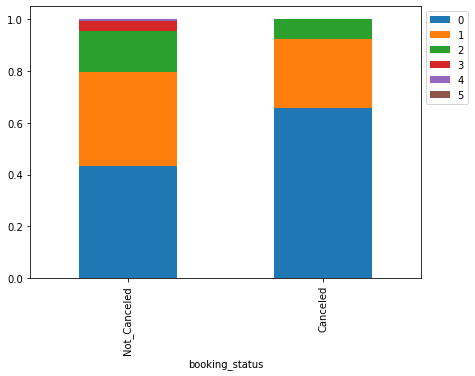

In [35]:
stacked_barplot(stardata, "booking_status", "no_of_special_requests")

In [36]:
a = 5703+1661
b = 12837+5607
c = a/b
print(c)

0.3992626328345261


#### Observation 
* There are 3 -5 special requests, the booking is not canceled. However, when there are 1 - 2 requests, bookings are canceled at 39%. When there are 0 requests forspeial assistance, nearly half or 48% are still canceled.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [37]:
# Binning reservations by quarter 

conditions = [
(stardata["avg_price_per_room"]<100),
(stardata["avg_price_per_room"].between(100, 200, inclusive=True)),
(stardata["avg_price_per_room"]>200)
]

categories = ['low-cost','medium-cost','high-cost']

stardata['price_range']=np.select(conditions, categories)
stardata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_range
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,low-cost
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,medium-cost
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,low-cost
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,medium-cost
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled,low-cost


In [38]:
stardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   type_of_meal_plan                     56926 non-null  category
 5   required_car_parking_space            56926 non-null  category
 6   room_type_reserved                    56926 non-null  category
 7   lead_time                             56926 non-null  int64   
 8   arrival_year                          56926 non-null  int64   
 9   arrival_month                         56926 non-null  int64   
 10  arrival_date                          56926 non-null  int64   
 11  ma

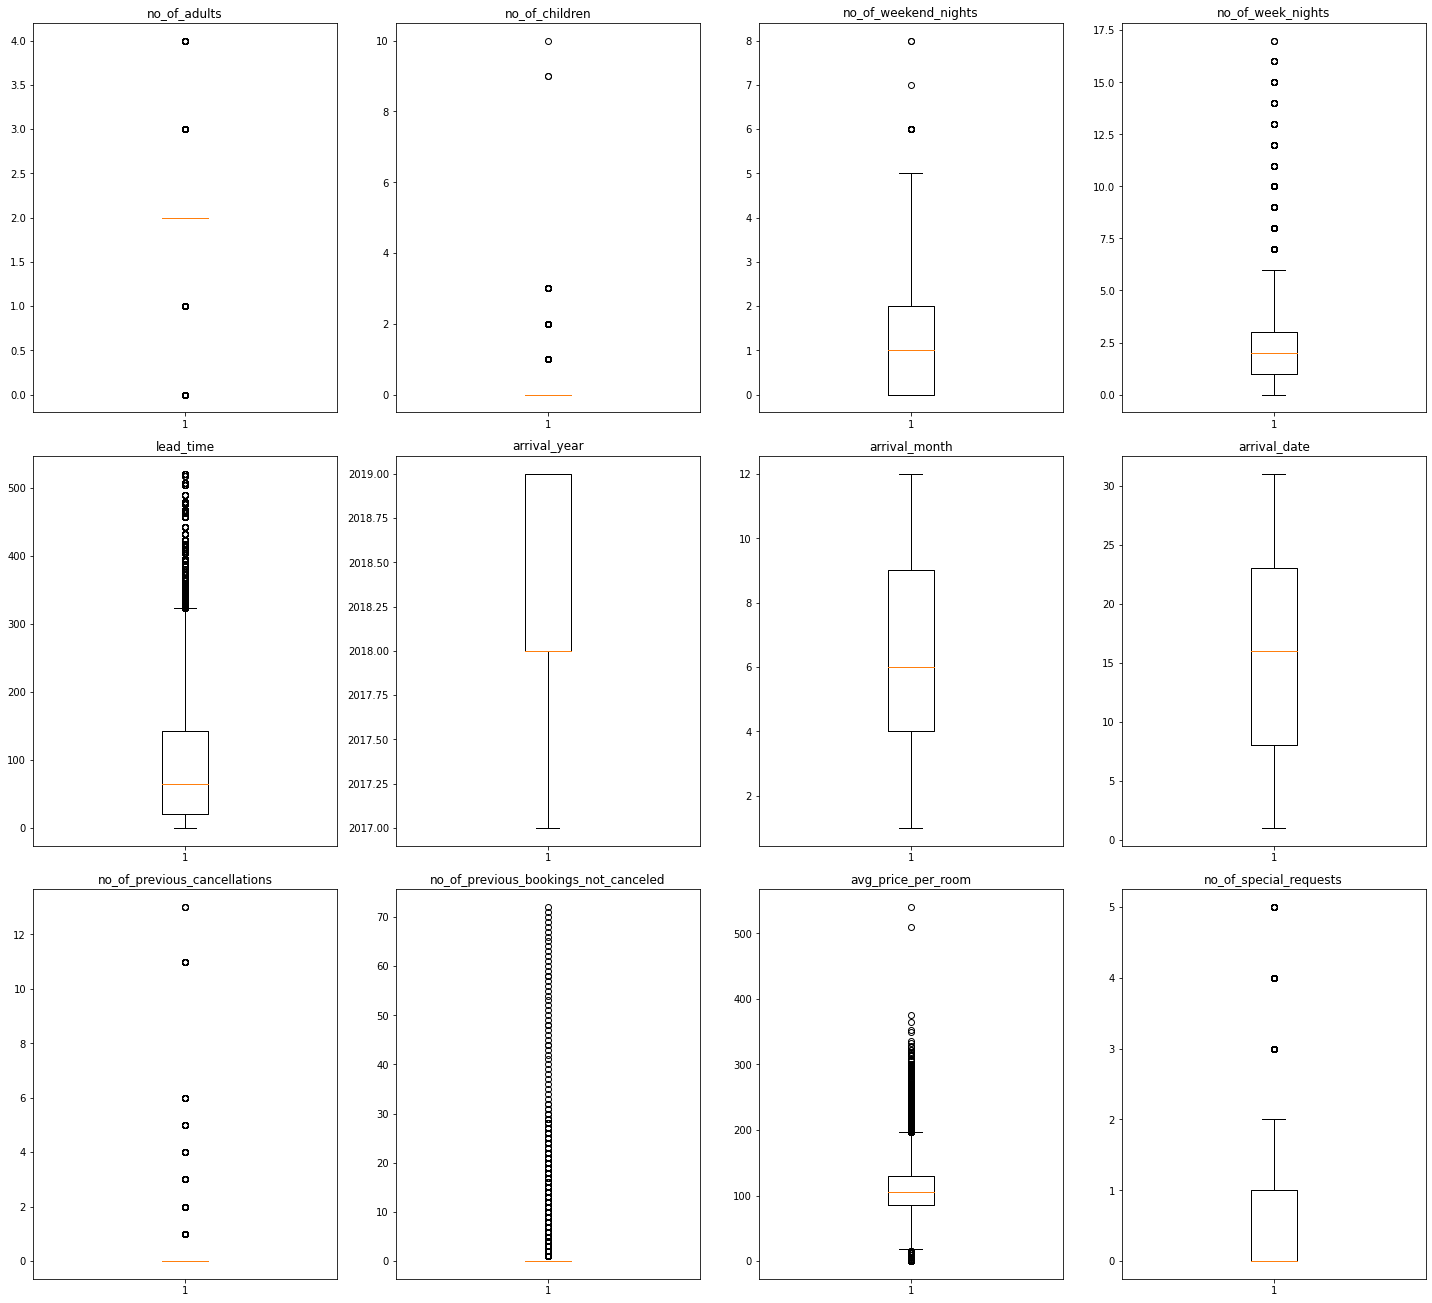

In [39]:
numerical_col = stardata.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(stardata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [40]:
stardata.drop(["required_car_parking_space"], axis=1, inplace=True)

In [41]:
stardata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,price_range
0,2,0,1,2,Meal Plan 1,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,low-cost
1,2,0,2,3,Not Selected,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,medium-cost
2,1,0,2,1,Meal Plan 1,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,low-cost
3,2,0,0,2,Meal Plan 1,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,medium-cost
4,3,0,0,3,Not Selected,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled,low-cost


In [42]:
stardata["booking_status"] = stardata["booking_status"].apply(lambda x: 1 if x == "Not_Canceled" else 0)

In [43]:
stardata.drop(["type_of_meal_plan"], axis=1, inplace=True) #this will need to be dropped 

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [44]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["booking_status"], margins=True).sort_values(
        by="1", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["booking_status"], normalize="index").sort_values(
        by=" 1", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [45]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
price_range                                                              
All                       42807          823            7        10413   
low-cost                  23260          587            4         1643   
medium-cost               19471          221            3         8500   
high-cost                    76           15            0          270   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7    All  
price_range                                                       
All                         983         1581          312  56926  
low-cost                     73           42           55  25664  
medium-cost                 723          937           68  29923  
high-cost                   187          602          189   1339  
------------------------------------------------------------------------------------------------------------------------


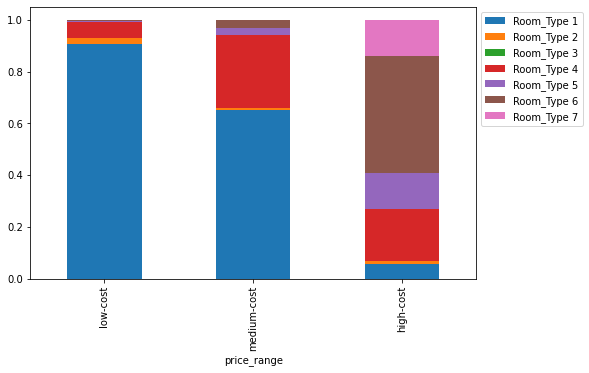

In [46]:
stacked_barplot(stardata, "price_range", "room_type_reserved")

#### Observation 
* Using the graph above, the majority of Room Type 1 are categorized in the low-cost and medium-cost rooms.
* Room type 6 is categorized largely in the high-cost section. 
* Room Type 7 and Room Type 5 have similar reservation numbers in the high cost category.

booking_status      0      1    All
price_range                        
All             21548  35378  56926
medium-cost     13645  16278  29923
low-cost         7081  18583  25664
high-cost         822    517   1339
------------------------------------------------------------------------------------------------------------------------


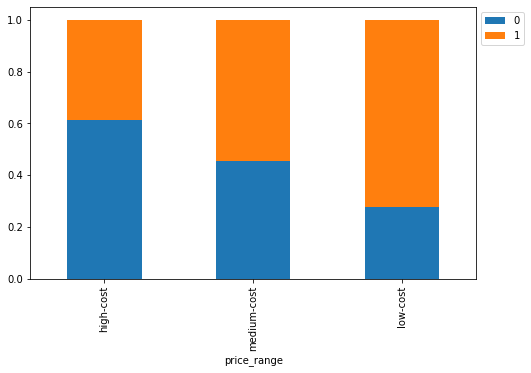

In [47]:
stacked_barplot(stardata, "price_range", "booking_status")

#### Observation
* Using the graoh above,we see that the high cost rooms are more likely to cancel as their cancellation rate is higher than those who don't. 
* Medium cost and low cost rooms have more people that do not cancel than those who do cancel.

no_of_previous_cancellations      0    1   2   3   4   5   6  11  13    All
price_range                                                                
low-cost                      25208  263  62  47  25  16  16  23   4  25664
All                           56411  316  66  47  25  16  16  25   4  56926
high-cost                      1339    0   0   0   0   0   0   0   0   1339
medium-cost                   29864   53   4   0   0   0   0   2   0  29923
------------------------------------------------------------------------------------------------------------------------


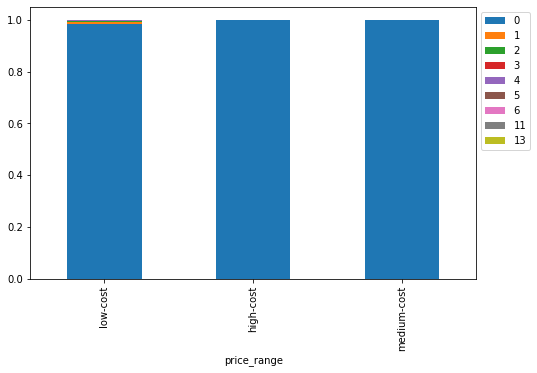

In [48]:
stacked_barplot(stardata, "price_range", "no_of_previous_cancellations")

#### Observation
* Using the graph above, we see that no high cost rooms have any cancellations and mostly low cost rooms are canceled.

no_of_previous_bookings_not_canceled      0    1    2    3   4   5   6   7  \
price_range                                                                  
low-cost                              24525  283  140  107  83  79  51  45   
All                                   55641  357  165  118  90  85  54  47   
high-cost                              1337    2    0    0   0   0   0   0   
medium-cost                           29779   72   25   11   7   6   3   2   

no_of_previous_bookings_not_canceled   8   9  10  11  12  13  14  15  16  17  \
price_range                                                                    
low-cost                              33  33  33  28  24  19  18  16  14  11   
All                                   34  33  33  28  25  19  20  16  15  12   
high-cost                              0   0   0   0   0   0   0   0   0   0   
medium-cost                            1   0   0   0   1   0   2   0   1   1   

no_of_previous_bookings_not_canceled  18  19  20  

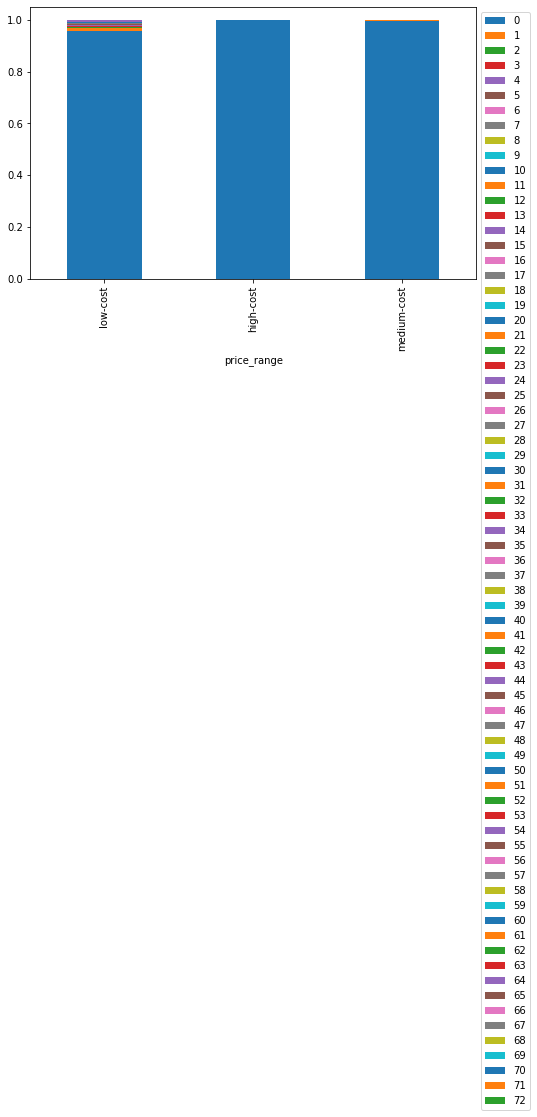

In [49]:
stacked_barplot(stardata, "price_range", "no_of_previous_bookings_not_canceled")

booking_status          0      1    All
room_type_reserved                     
All                 21548  35378  56926
Room_Type 1         15651  27156  42807
Room_Type 4          4206   6207  10413
Room_Type 6           856    725   1581
Room_Type 5           408    575    983
Room_Type 2           311    512    823
Room_Type 7           114    198    312
Room_Type 3             2      5      7
------------------------------------------------------------------------------------------------------------------------


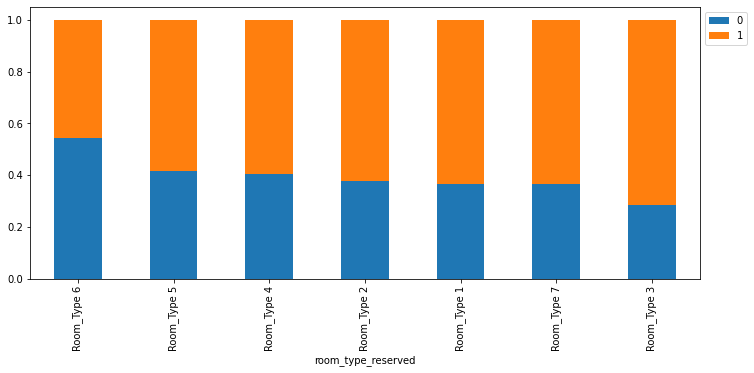

In [50]:
stacked_barplot(stardata, "room_type_reserved", "booking_status")

In [51]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

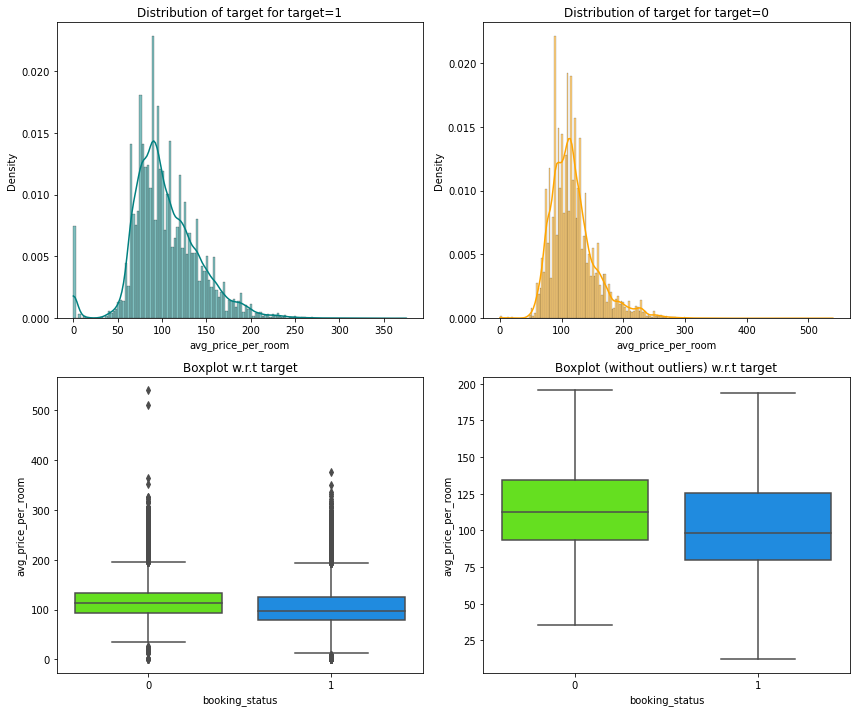

In [52]:
distribution_plot_wrt_target(stardata, "avg_price_per_room", "booking_status")

In [53]:
stardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          56926 non-null  int64   
 1   no_of_children                        56926 non-null  int64   
 2   no_of_weekend_nights                  56926 non-null  int64   
 3   no_of_week_nights                     56926 non-null  int64   
 4   room_type_reserved                    56926 non-null  category
 5   lead_time                             56926 non-null  int64   
 6   arrival_year                          56926 non-null  int64   
 7   arrival_month                         56926 non-null  int64   
 8   arrival_date                          56926 non-null  int64   
 9   market_segment_type                   56926 non-null  category
 10  repeated_guest                        56926 non-null  category
 11  no

In [54]:
# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Building a Logistic Regression model

In [55]:
# dropping a few variables that will not affect the model too much, some of them have low variance.
stardata = stardata.drop(["arrival_year", "arrival_date","price_range", "no_of_previous_cancellations"], axis=1)
#this type of data will be irrelevant

In [56]:
X = stardata.drop(["booking_status"], axis=1)
Y = stardata["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [57]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (39848, 20)
Shape of test set :  (17078, 20)
Percentage of classes in training set:
1    0.620684
0    0.379316
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.623317
0    0.376683
Name: booking_status, dtype: float64


In [59]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Logistic Regression (with statsmodel library)

In [69]:
X = stardata.drop(["booking_status"], axis=1)
Y = stardata["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [70]:
# fitting logistic regression model
logit = sm.GLM(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                39848
Model:                            GLM   Df Residuals:                    39827
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                         0.15177
Method:                          IRLS   Log-Likelihood:                -18967.
Date:                Fri, 26 May 2023   Deviance:                       6044.7
Time:                        13:21:27   Pearson chi2:                 6.04e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4241
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [71]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.783728,0.877047,0.795482,0.834276


#### Observations
* Negative values of the coefficient shows that probability of someone cancelling their reservation decreases with the increase of corresponding attribute value.
* Positive values of the coefficient shows that the probability of someone cancelling their reservation increases with the increase of corresponding attribute value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

# Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [72]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   276.062443
no_of_adults                              1.372362
no_of_children                            2.038860
no_of_weekend_nights                      1.063749
no_of_week_nights                         1.082747
lead_time                                 1.144730
arrival_month                             1.037348
no_of_previous_bookings_not_canceled      1.462037
avg_price_per_room                        1.889994
no_of_special_requests                    1.170714
room_type_reserved_Room_Type 2            1.074779
room_type_reserved_Room_Type 3            1.000942
room_type_reserved_Room_Type 4            1.305345
room_type_reserved_Room_Type 5            1.099803
room_type_reserved_Room_Type 6            2.033190
room_type_reserved_Room_Type 7            1.131930
market_segment_type_Complementary         3.567310
market_segment_type_Corporate            12.844814
market_segment_type_Offline              48.827

In [73]:
#removing market_segment_type_Offline

X_train1 = X_train.drop("market_segment_type_Offline", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))


Series before feature selection: 

const                                   32.815001
no_of_adults                             1.354257
no_of_children                           2.038550
no_of_weekend_nights                     1.062732
no_of_week_nights                        1.082108
lead_time                                1.139329
arrival_month                            1.037185
no_of_previous_bookings_not_canceled     1.458549
avg_price_per_room                       1.888646
no_of_special_requests                   1.170649
room_type_reserved_Room_Type 2           1.074778
room_type_reserved_Room_Type 3           1.000939
room_type_reserved_Room_Type 4           1.296264
room_type_reserved_Room_Type 5           1.099702
room_type_reserved_Room_Type 6           2.033111
room_type_reserved_Room_Type 7           1.131902
market_segment_type_Complementary        1.279416
market_segment_type_Corporate            1.487255
market_segment_type_Online               1.500965
repeated_guest_

In [74]:
logit2 = sm.GLM(y_train, X_train1.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.783829,0.876966,0.795642,0.834327


In [75]:
print(lg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                39848
Model:                            GLM   Df Residuals:                    39828
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.15187
Method:                          IRLS   Log-Likelihood:                -18981.
Date:                Fri, 26 May 2023   Deviance:                       6048.8
Time:                        13:22:18   Pearson chi2:                 6.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4235
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [77]:
#Dropping No of adults
X_train2 = X_train1.drop(
    ["no_of_adults"], axis=1
)

logit3 = sm.GLM(y_train, X_train2.astype(float))
lg3 = logit3.fit()

print(lg3.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                39848
Model:                            GLM   Df Residuals:                    39829
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.15187
Method:                          IRLS   Log-Likelihood:                -18981.
Date:                Fri, 26 May 2023   Deviance:                       6048.8
Time:                        13:22:58   Pearson chi2:                 6.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4235
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [78]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.GLM(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Online', 'repeated_guest_1']


In [79]:
X_train3 = X_train2[selected_features]

In [80]:
logit4 = sm.GLM(y_train, X_train3.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                39848
Model:                            GLM   Df Residuals:                    39831
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.15187
Method:                          IRLS   Log-Likelihood:                -18982.
Date:                Fri, 26 May 2023   Deviance:                       6049.1
Time:                        13:23:20   Pearson chi2:                 6.05e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4234
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [81]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Online,repeated_guest_1
Odds,3.307218,0.986454,0.989704,0.997435,1.007736,0.996016,0.997285,1.209784,1.059517,1.040659,1.052716,1.078338,1.124271,0.656008,0.856100,0.772216,1.036794
Change_odd%,230.721831,-1.354639,-1.029585,-0.256530,0.773560,-0.398421,-0.271480,20.978441,5.951736,4.065912,5.271593,7.833795,12.427125,-34.399180,-14.389969,-22.778394,3.679374


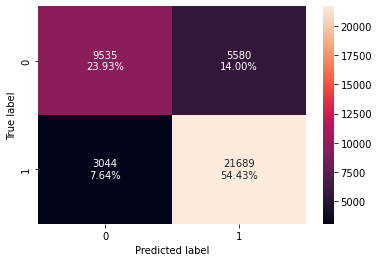

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train3, y_train)

In [83]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg4, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.783578,0.876926,0.795372,0.83416


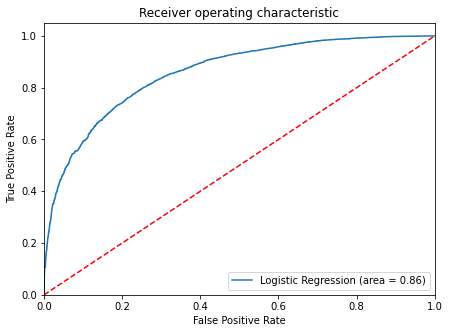

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Model performance evaluation

In [85]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6022110465160474


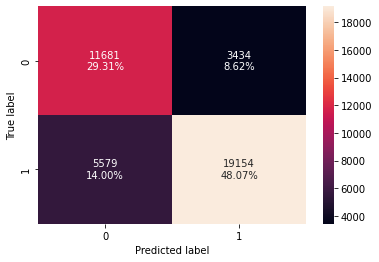

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [87]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.773815,0.774431,0.847972,0.809535


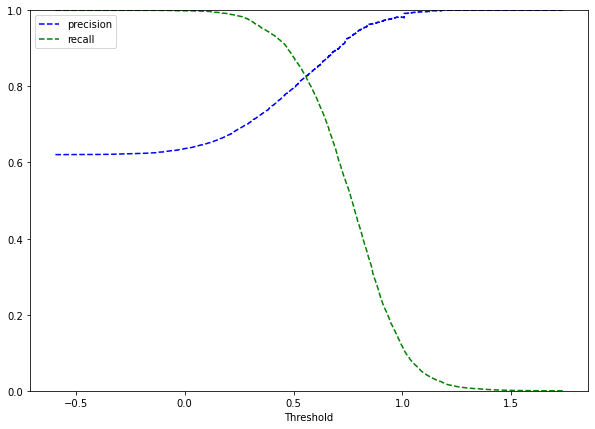

In [88]:
from sklearn.metrics import precision_recall_curve  #import the library
y_scores = lg4.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [89]:
# setting the threshold
optimal_threshold_curve = 0.60

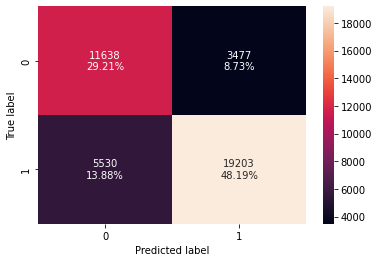

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train3, y_train, threshold=optimal_threshold_curve)

In [91]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.773966,0.776412,0.846693,0.810031


In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.37 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.33 Threshold,Logistic Regression-0.37 Threshold
Accuracy,0.783578,0.773815,0.773966
Recall,0.876926,0.774431,0.776412
Precision,0.795372,0.847972,0.846693
F1,0.834160,0.809535,0.810031


In [122]:
X_test3 = X_test[list(X_train3.columns)]

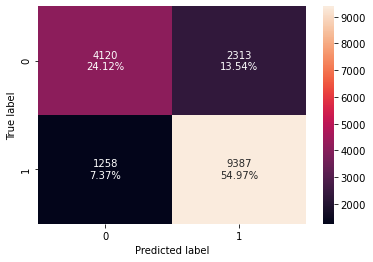

In [123]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test)

In [124]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg4, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790901,0.881822,0.802308,0.840188


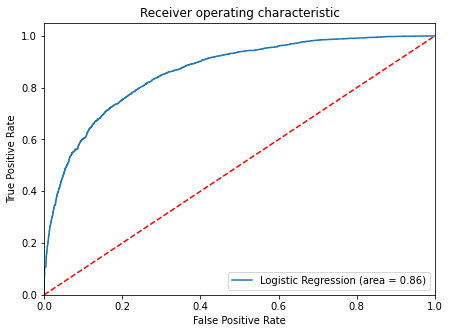

In [125]:
logit_roc_auc_train = roc_auc_score(y_test, lg4.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

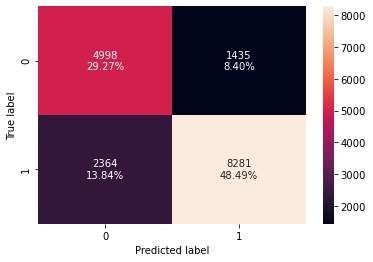

In [126]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [127]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77755,0.777924,0.852305,0.813418


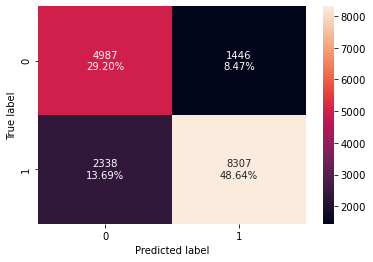

In [128]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test3, y_test, threshold=optimal_threshold_curve)

In [129]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.778428,0.780366,0.851738,0.814492


## Final Model Summary

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.60 Threshold",
    "Logistic Regression-0.6 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.60 Threshold,Logistic Regression-0.6 Threshold
Accuracy,0.783578,0.773815,0.773966
Recall,0.876926,0.774431,0.776412
Precision,0.795372,0.847972,0.846693
F1,0.834160,0.809535,0.810031


In [131]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.60 Threshold",
    "Logistic Regression-0.6 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.60 Threshold,Logistic Regression-0.6 Threshold
Accuracy,0.790901,0.777550,0.778428
Recall,0.881822,0.777924,0.780366
Precision,0.802308,0.852305,0.851738
F1,0.840188,0.813418,0.814492


## Building a Decision Tree model

In [132]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)


In [133]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [134]:
#wj is the weight for each class (j signifies the class)
# n_samples is the total number of samples or rows in the dataset
# n_classesis the total number of unique classes in the target
# n_samplesis the total number of rows of the respective class
n_samples = X_train3.shape[0]
n_samples_1 = y_train.value_counts()[0]
n_samples_0 = y_train.value_counts()[1]
n_classes = y_train.nunique()

w_0=n_samples / (n_classes * n_samples_0)
w_1=n_samples / (n_classes * n_samples_1)

In [136]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: w_0, 1: w_1}, random_state=1
)

In [137]:
model.fit(X_train3, y_train)

DecisionTreeClassifier(class_weight={0: 0.8055634172967291,
                                     1: 1.3181607674495535},
                       random_state=1)

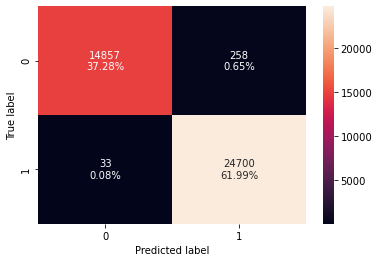

In [138]:
confusion_matrix_sklearn(model, X_train3, y_train)

In [139]:
decision_tree_perf_train = get_recall_score(model, X_train3, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.998665750212267


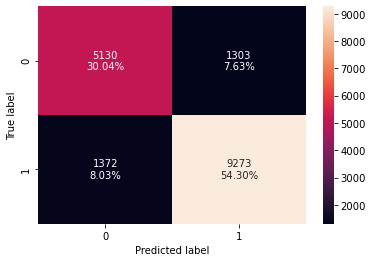

In [140]:
confusion_matrix_sklearn(model, X_test3, y_test)

In [141]:
decision_tree_perf_test = get_recall_score(model, X_test3, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8711131986848285


## Do we need to prune the tree?

In [142]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: w_0, 1: w_1})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [143]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007092
1,1.597841e-20,0.007092
2,1.597841e-20,0.007092
3,1.597841e-20,0.007092
4,1.597841e-20,0.007092
...,...,...
2760,8.141698e-03,0.264184
2761,9.268169e-03,0.273452
2762,1.380155e-02,0.301055
2763,2.058553e-02,0.321640


<function matplotlib.pyplot.show(close=None, block=None)>

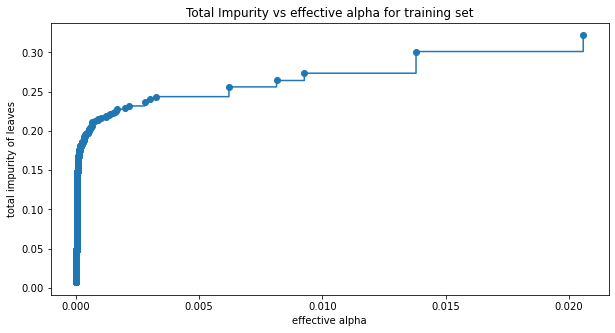

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show

#### Observation 
* We do not need to prune this tree.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Conclusions:

* The model can be used to predict if a hotel room booking is going to be canceled or not
* Different trees and their confusion matrix were used to better visualize and understand the model.
* Lead_time, avg_price_per_room, and arrival_month are the most important variable in predicting the customers that will cancel their reservation.

## Recommendations:

* Using the information from the decision tree model, we can conclude that if a customer books their reservation in less than 58.49 days then the customer will not be cancelling their reservation.
* The booking status has a negative correlation with the market segment type as complementary
* When the price of a hotel room is lower, the booking is less likely to be canceled. This was exemplified through Room Type 7, 6 and 5, which all have strong correlation to bookings.
* Most bookings occur during the months of June, July, and August.
* Week nights have high correlation with booking and less likely to be canceled than weekend nights.
* When the reservation is made online, the booking is less likely to get canceled.

## END